### The classic and interesting Kaggle startup case [Titanic](https://www.kaggle.com/c/titanic)
Most people are familiar with the context of this story. Titanic, a huge cruise ship, broke by an ice hill. Since there is not enough lifeboats for everyone to escape, the survival of a passenger is decided by many factors, i.e., the captain roared, 'lady and kid first!', so passenger of certain gender and age may have a higher life possibility.


The trainiing and testing data are some passengers' personal information and survival result. Based on these data, we try to generate appropriate model and predict the survival of other people. And as a typical 2-class classification problem, many classification algorithms can work to solve it.

In my ipython notebooks, I will mainly show my way of thinking this problem and how to solve it step by step.

This is the first notebook working on exploratory data analysis of the Titanic data

**<font color=purple>Everytime, look at data first!</font>**<br>
import data using pandas

In [1]:
import pandas as pd
import numpy as np

data_train = pd.read_csv("Train.csv")
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**<font color=purple>Look at the fields and their basic info</font>**</br>

In [2]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<font color="purple">
It tells us that there are 891 passengers in training data, and records of certain features are not complete .
</font>

* <font color="purple">Age: 714</font>
* <font color="purple">Cabin: 204</font>

<font color="purple">From function info(), we can see the data type and count of notnull values of features.</font>


In [3]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<font color="purple">describe() shows descriptive statistics of the numerical features<font>
<font color="purple">Also, we can get simple conclusions like nearly 38% of passengers got saved, the average age is 30 years old, more people took class 2 and 3 instead of 1

** <font color="purple">Then we can find relationship between survival and other features</font>**

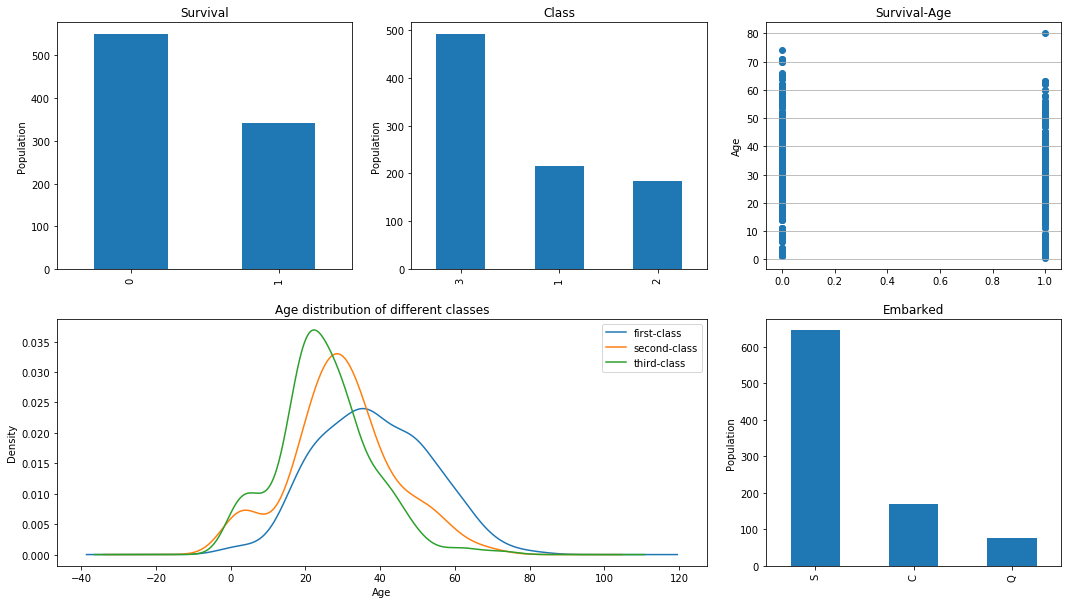

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(18,10))
fig.set(alpha=0.2)  # set the color of the figure

plt.subplot2grid((2,3),(0,0))
data_train.Survived.value_counts().plot(kind='bar')
plt.title("Survival")
plt.ylabel("Population")

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind='bar')
plt.title("Class")
plt.ylabel("Population")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.grid(b=True,axis='y')  # True: draw the grid
plt.title("Survival-Age")
plt.ylabel("Age")

plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde') # kernal density estimate
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age distribution of different classes")
plt.legend(('first-class', 'second-class', 'third-class'))

plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.ylabel("Population")
plt.title("Embarked")

Less survival than death, as was said. 

Class 3>1>2.

No direct relationship between age and survival.

Older people tend to take more expensive classes, but not very obvious.

Embarked S>C>Q

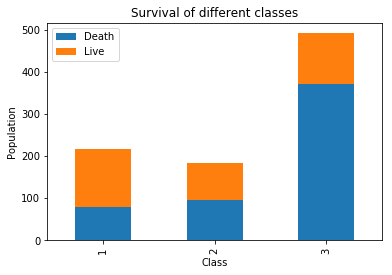

In [30]:
# Look at survival of different classes
from pandas import DataFrame
fig = plt.figure()
fig.set(alpha=0.2)

# Use a stacked bar chart. Bar chart needs 2D data. We can feed in classes/Survival
Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = pd.DataFrame({'Death':Survived_0, 'Live':Survived_1})
df.plot(kind='bar',stacked = True)
plt.title("Survival of different classes")
plt.xlabel("Class")
plt.ylabel("Population")


Obviously, people in class 1 have the highest possibility of being saved, while the ones in class 3 have lowest.

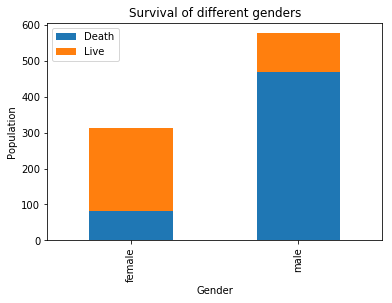

In [32]:
# Look at survival of different genders
Survived_0 = data_train.Sex[data_train.Survived == 0].value_counts()
# Can also group by survival
#Survived_M = data_train.Survived[data_train.Sex == "male"].value_counts()
Survived_1 = data_train.Sex[data_train.Survived == 1].value_counts()
df = pd.DataFrame({'Death':Survived_0, 'Live':Survived_1})
df.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Population')
plt.title("Survival of different genders")

Lady first is practiced really well.

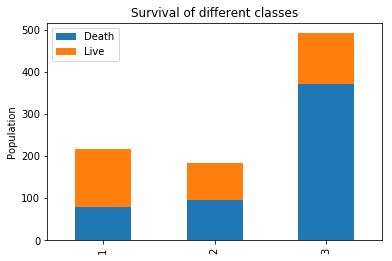

In [33]:
# Look at survival of different class
Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = pd.DataFrame({'Death':Survived_0, 'Live':Survived_1})
df.plot(kind='bar', stacked=True)
plt.ylabel('Population')
plt.title("Survival of different classes")


Higher classes have higher possibility of being saved.

In [42]:
"""Look at survival of family factor
   And we simply like at summary dataframes of Sibsp and Parch
"""
sib = data_train.groupby(['SibSp', 'Survived'])
df = pd.DataFrame(sib.count()['PassengerId']) 
#groupresult.count(), similar to select count in sql; and choose a column
df


PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [43]:
parch = data_train.groupby(['Parch','Survived'])
df = pd.DataFrame(parch.count()['PassengerId'])
df

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

Number of family members don't have obvious relationship with survive. But we can find people with 1-2 family members may have a higher survival odds.

In [44]:
# Look at cabin
data_train.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
E101               3
F33                3
D                  3
F2                 3
C22 C26            3
B35                2
B77                2
B22                2
D17                2
C2                 2
C78                2
B49                2
E25                2
C65                2
B28                2
C126               2
E121               2
D35                2
D33                2
E24                2
B20                2
C123               2
C68                2
B18                2
F4                 2
E8                 2
B57 B59 B63 B66    2
                  ..
E68                1
C87                1
B73                1
E50                1
C85                1
A5                 1
C111               1
A34                1
B80                1
D47                1
E38                1
F G63              1
B38                1
F E69              1
A24                1
C106               1
A7           

There are many numbers of cabins. Maybe A,B,C,D,E,F refer to an area, and the number refers to a specifc seat.

Also, as we show in df.info(), cabin field has a lot of missing values. Since it's not easy to visualize based on so many categories, we can see the difference of survival among the missing or not.

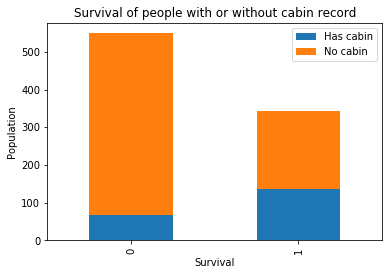

In [47]:
fig = plt.figure()
Survived_notnull = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_null = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df = pd.DataFrame({'Has cabin':Survived_notnull, 'No cabin':Survived_null})
df.plot(kind='bar', stacked=True)
plt.xlabel('Survival')
plt.ylabel('Population')
plt.title("Survival of people with or without cabin record")

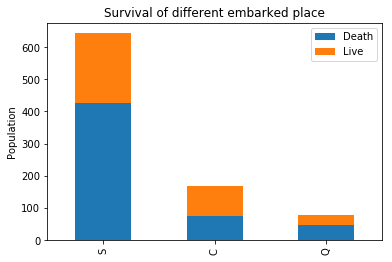

In [48]:
# Look at survival of different class, the same way to visualize as "PClass"
Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df = pd.DataFrame({'Death':Survived_0, 'Live':Survived_1})
df.plot(kind='bar', stacked=True)
plt.ylabel('Population')
plt.title("Survival of different embarked place")

Except that people embarked at 'C' may have a higher survival rate, no finding!

In [50]:
# Look at ticket
data_train.Ticket.value_counts()

CA. 2343             7
347082               7
1601                 7
347088               6
3101295              6
CA 2144              6
382652               5
S.O.C. 14879         5
4133                 4
LINE                 4
2666                 4
W./C. 6608           4
17421                4
113760               4
113781               4
PC 17757             4
347077               4
19950                4
349909               4
248727               3
SC/Paris 2123        3
345773               3
29106                3
230080               3
F.C.C. 13529         3
24160                3
347742               3
239853               3
PC 17572             3
363291               3
                    ..
4138                 1
347062               1
349241               1
SOTON/OQ 392090      1
C.A. 33111           1
315096               1
349227               1
A.5. 11206           1
370369               1
237442               1
349221               1
SC/PARIS 2149        1
3474       

Seemingly have no idea of so many different valued......

In [58]:
# Look at ticket. People who survived purchases a more costly ticket. A similar finding in "Pclass".
print(data_train.Fare[data_train.Survived == 0].mean())
print(data_train.Fare[data_train.Survived == 1].mean())

22.117886885245877
48.39540760233917


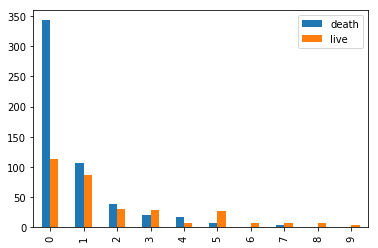

In [76]:
# Divide ticket 0-150 to 10 groups and observe the proportion of death and live
lives, deaths = [],[]
for i in range(10):
    live = len(data_train.Fare[(data_train.Survived == 1) & (data_train.Fare >=15*i) & (data_train.Fare < 15*(i+1))])
    death = len(data_train.Fare[(data_train.Survived == 0) & (data_train.Fare >=15*i) & (data_train.Fare < 15*(i+1))])
    lives.append(live)
    deaths.append(death)
df = pd.DataFrame({'live':lives,'death':deaths})
df.plot(kind='bar')

It's obvious that people taking a ticket cheapest(lower than 15) has a lowest possibility being saved